In [1]:
import numpy as np
import os
from pathlib import Path
from keras.preprocessing import image
import pandas as pd
from matplotlib import pyplot as plt

Using TensorFlow backend.
/home/insanenerd/myvenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/insanenerd/myvenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/insanenerd/myvenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/insanenerd/myvenv/lib/python3.6/site-packages/t

In [2]:
df = pd.read_csv('Datasets/Train/train.csv')
alllabels = np.array(df)
corrlabels = {}


In [3]:
for i in range(alllabels.shape[0]):
    corrlabels[alllabels[i][0]]=alllabels[i][1]

In [4]:
p = Path("Datasets/Train/Images/")
#dirs = p.glob("*")

image_data = []
labels=[]
labels_dict = {"Pikachu":0,"Bulbasaur":1,"Charmander":2}
i=0
for img_path in p.glob("*.jpg"):
    label = str(img_path).split('/')[-1]
    
    img = image.load_img(img_path,target_size=(100,100))
    img_array = image.img_to_array(img)
    image_data.append(img_array)
    labels.append(labels_dict[corrlabels[label]])
    i+=1
image_data = np.array(image_data,dtype="float32")/255
save_data = image_data.copy()
labels = np.array(labels)

print(image_data.shape,labels.shape)
# for i in range(20):
#     print(labels[i])
#     plt.imshow(image_data[i])
#     plt.show()
# image_data = []
# labels = []
# labels_dict = {"Pikachu":0,"Balbasaur":1,"Charmander":2}
# for folder_dir in dirs:
    
#     label = str(folder_dir).split("/")[-1][:-1]
    
    
    
#     for img_path in folder_dir.glob("*.jpg"):
#         img = image.load_img(img_path,target_size=(32,32))
#         img_array = image.img_to_array(img)
#         image_data.append(img_array)
#         labels.append(labels_dict[label])

/home/insanenerd/myvenv/lib/python3.6/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


(304, 100, 100, 3) (304,)


In [5]:
print(len(image_data))
print(labels)

304
[2 1 1 2 0 1 2 0 0 0 1 1 0 1 2 1 0 0 1 2 1 2 0 0 2 2 0 0 0 0 0 0 1 2 1 0 0
 2 2 2 2 0 2 1 2 0 2 0 1 1 2 0 2 1 0 1 0 0 2 0 0 0 2 0 0 1 2 1 1 0 2 1 2 2
 0 2 2 2 0 0 0 2 2 1 2 1 1 2 1 2 2 2 2 2 1 1 1 0 2 2 0 0 2 0 1 0 1 1 2 2 2
 0 2 0 1 2 2 1 2 0 0 1 0 0 2 2 1 0 2 1 1 0 0 2 1 0 0 1 0 2 1 1 2 1 2 2 0 1
 0 0 1 1 1 0 2 0 2 0 1 2 0 1 1 2 2 0 2 0 1 2 0 0 2 0 2 1 1 1 1 1 2 1 1 0 2
 2 1 2 1 1 0 2 0 1 1 2 2 2 2 0 0 2 1 1 0 1 2 0 0 0 1 0 2 1 2 1 2 1 1 2 0 0
 0 0 1 0 2 2 1 1 2 1 2 1 0 1 2 1 1 0 2 2 1 2 1 2 1 2 0 1 2 1 1 2 1 0 1 2 1
 2 0 2 1 0 1 2 1 0 0 2 0 1 1 0 1 2 0 2 2 0 1 1 2 0 0 1 1 1 1 0 0 1 0 1 2 0
 2 0 0 0 0 0 1 2]


In [6]:
# import random
# combined = list(zip(image_data,labels))
# random.shuffle(combined)

# image_data[:],labels[:] = zip(*combined) 

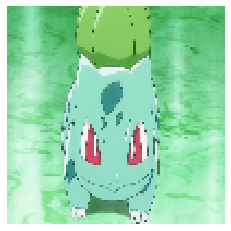

In [7]:
def drawImg(img):
    from matplotlib import pyplot as plt
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    return 
drawImg(image_data[48])

# SVM Classifier

In [8]:
class SVM:
    def __init__(self,C=1.0):
        self.c = C
        self.W = 0
        self.b = 0
    
    def hingeloss(self, W,b,X,Y):
        loss = 0
        
        loss+= 0.5*(np.dot(W,W.T))
        
        m = X.shape[0]
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.c * (max(0,1-ti))
        
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=50, learning_rate = 0.001,maxItr=100):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        C = self.c
        w = np.zeros((1,no_of_features))
        
        bias = 0
        
        #Initial Loss
        print(self.hingeloss(w,bias,X,Y))
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            l = self.hingeloss(w,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            for batch_start in range(0, no_of_samples, batch_size):
                gradw= 0
                gradb= 0
                
                for j in range(batch_start, batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti = Y[i]*(np.dot(w,X[i].T)+bias)
                        
                        if ti>1:
                            gradw+=0
                            gradb+=0
                        else:
                            gradw += C*Y[i]*X[i]
                            gradb += C*Y[i]
                w = w-n*w + n*gradw
                bias = bias + n*gradb
        self.W=w
        self.b=bias
        
        return w,bias,losses
            

In [9]:
M = image_data.shape[0]
image_data = image_data.reshape(M,-1)
print(image_data.shape)
print(labels.shape)


(304, 30000)
(304,)


In [10]:
CLASSES = len(np.unique(labels))
print(CLASSES)

3


In [11]:
def classWiseData(x,y):
    data ={}
    for i in range(CLASSES):
        data[i] = []
    
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
    
    for k in data.keys():
        data[k] = np.array(data[k])
    return data

In [12]:
data = classWiseData(image_data,labels)

In [13]:
def getDataPairForSVM(d1,d2):
    """Combines Data of 2 classes into a single matrix"""
    l1,l2 = d1.shape[0],d2.shape[0]
    samples = l1+l2
    features = d1.shape[1]
    
    data_pair = np.zeros((samples,features))
    data_labels = np.zeros((samples,))
    data_pair[:l1,:]=d1
    data_pair[l1:,:]=d2
    
    data_labels[:l1] = -1
    data_labels[l1:] = +1
    return data_pair, data_labels

# Lets start Training

In [14]:
mySVM = SVM()
xp,yp = getDataPairForSVM(data[0],data[1])
w,b,loss = mySVM.fit(xp,yp,learning_rate = 0.000001,maxItr=700)
print(loss[-1])
# from matplotlib import pyplot as plt
# plt.plot(loss)

202.0
1.2770592764846416


In [15]:
def trainSVMs(x,y):
    svm_classifiers = {}
    for i in range(CLASSES):
        svm_classifiers[i] = {}
        for j in range(i+1,CLASSES):
            xpair,ypair = getDataPairForSVM(data[i],data[j])
            wts,b,loss = mySVM.fit(xpair,ypair,learning_rate = 0.00001,maxItr=1000)
            svm_classifiers[i][j] = (wts,b)
#             plt.plot(loss)
#             plt.show
            
    return svm_classifiers

In [16]:
svm_classifiers=trainSVMs(image_data,labels)

202.0
203.0
203.0


In [17]:
def binaryPredict(x,w,b):
    z = np.dot(x,w.T)+b
    if(z>=0):
        return 1
    else:
        return -1

In [18]:
def predict(x):
    count = np.zeros((CLASSES,))
    
    for i in range(CLASSES):
        for j in range(i+1,CLASSES):
            w,b = svm_classifiers[i][j]
            z = binaryPredict(x,w,b)
            
            if(z==1):
                count[j]+=1
            else:
                count[i]+=1
    final_prediction = np.argmax(count)
    
    
    return final_prediction

In [19]:
print(predict(image_data[20]))
print(labels[20])

1
1


In [20]:
def accuracy(x,y):
    count=0
    for i in range(x.shape[0]):
        prediction = predict(x[i])
        if(prediction==y[i]):
            count+=1
    return count/x.shape[0]
def check(x1,x2,y):
    inv_labels_dict = {0:"Pikachu",1:"Bulbasaur",2:"Charmander"}
    for i in range(10):
        currpred = predict(x1[i])
        print(inv_labels_dict[currpred],inv_labels_dict[y[i]])
        plt.imshow(x2[i])
        plt.show()

1.0
Charmander Charmander


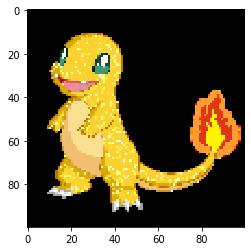

Bulbasaur Bulbasaur


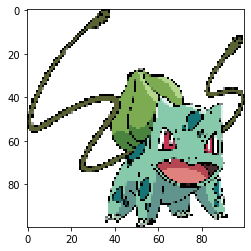

Bulbasaur Bulbasaur


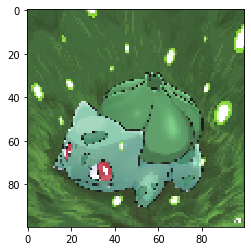

Charmander Charmander


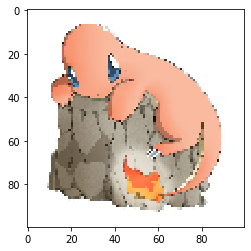

Pikachu Pikachu


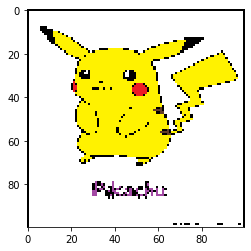

Bulbasaur Bulbasaur


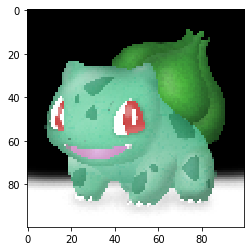

Charmander Charmander


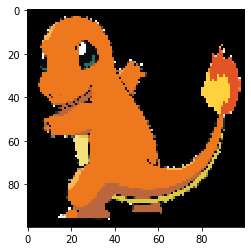

Pikachu Pikachu


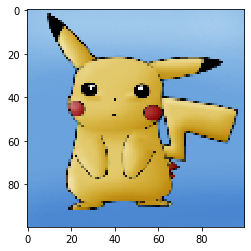

Pikachu Pikachu


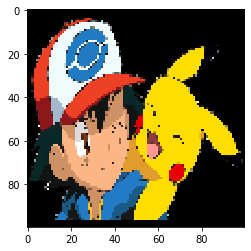

Pikachu Pikachu


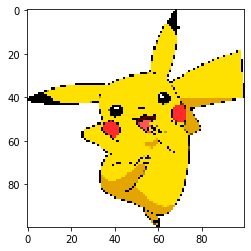

In [21]:
print(accuracy(image_data,labels))
check(image_data,save_data,labels)

In [22]:
test_images =[]
imgs_name = []
p1 = Path("Datasets/Test/Images/")



i=0
for img_path in p1.glob("*.jpg"):
    label = str(img_path).split('/')[-1]
    imgs_name.append(label)
    img = image.load_img(img_path,target_size=(100,100))
    img_array = image.img_to_array(img)
    test_images.append(img_array)
    
    i+=1
print(i)

test_images = np.array(test_images,dtype="float32")/255
imgs_name = np.array(imgs_name)
print(test_images.shape)

123
(123, 100, 100, 3)


In [23]:
df = pd.read_csv('Datasets/Test/test.csv')
test = np.array(df)
print(test.shape)
dict_test_labels = {}


(123, 1)


In [24]:
def ontestdata(test_images,imgs_name,test,test_save):
    inv_labels_dict = {0:"Pikachu",1:"Bulbasaur",2:"Charmander"}
#     res = np.zeros((test_images.shape[0],2))
#     res = np.array(res, dtype="str")
    labels={}
    for i in range(test_images.shape[0]):
        pred = predict(test_images[i])
        labels[imgs_name[i]]=inv_labels_dict[pred]
#         res[i][0]=test[i][0]
#         res[i][1]=inv_labels_dict[pred]
#         print(inv_labels_dict[pred])
#         plt.imshow(test_save[i])
#         plt.show()
    return labels

M = test_images.shape[0]
test_save = test_images.copy()
test_images = test_images.reshape(M,-1)
dict_test_labels=ontestdata(test_images,imgs_name,test,test_save)
res = np.zeros((test.shape[0],2))
res = np.array(res, dtype="str")
for i in range(test.shape[0]):
    res[i][0]=test[i][0]
    res[i][1]=dict_test_labels[test[i][0]]
    
df = pd.DataFrame(res)
df.to_csv('Datasets/Test/mytest.csv')


In [25]:
from sklearn import svm

In [26]:
svm_classifier = svm.SVC(kernel="poly" ,C=1)

In [27]:
svm_classifier.fit(image_data,labels)
svm_classifier.score(image_data,labels)

0.9802631578947368